In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi']  #指定默认字体 SimHei黑体
plt.rcParams['axes.unicode_minus'] = False   #解决保存图像是负号'
import jieba


In [2]:
stop_list  = pd.read_csv("停用词.txt",index_col=False,quoting=3,  #停用词
                         sep="\t",names=['stopword'], encoding='utf-8')
#Jieba分词函数
def txt_cut(juzi):
    lis=[w for w in jieba.lcut(juzi) if w not in stop_list.values]
    return " ".join(lis)

In [3]:
df=pd.read_excel('文本.xlsx')
data=pd.DataFrame()
data['label']=df['种类']
data['cutword']=df['内容'].astype('str').apply(txt_cut)
data['cutword']=data['cutword'].str.replace('\n','')
data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\qzca\AppData\Local\Temp\jieba.cache
Loading model cost 1.011 seconds.
Prefix dict has been built successfully.


,label,cutword
0,教育,法国 欢迎 理科生 商学院 学生 易 就业 月 24 日 法国 文化 开放日 ...
1,教育,留学 提醒 教育部 发布 赴 比利时 留学 预警 针对 最近 我国 赴 比利时 留...
2,教育,留学 访谈实录 澳际 专家 谈 国际 教育 巡回展 10 月 16 日 下午 点 ...
3,教育,五名 中国 留学生 诈骗 现金 韩 被捕 环球时报 韩国 警方 24 日 逮捕...
4,教育,专家 提醒 留学 忌 盲目 做好 职业规划 人民网 天津 视窗 月 日电 记者 采...
...,...,...
69995,家居,儿童房 墙面 装修 学问 很大 儿童房 装修 特别 墙面 装修 尤为重要 大家 知...
69996,家居,新奇 厨卫 创意 飞 独一无二 黑色 马桶 此款 产品 伊奈 去年 上市...
69997,家居,涂装 课堂 高温 夏季 儿童房 装修 指南 夏季 反应 儿童 远比 成人 强烈 夏...
69998,家居,防止 居室 病 儿童房 装修 学问 儿童房 装饰 父母 家中 房间 花费 心思...


<AxesSubplot:>

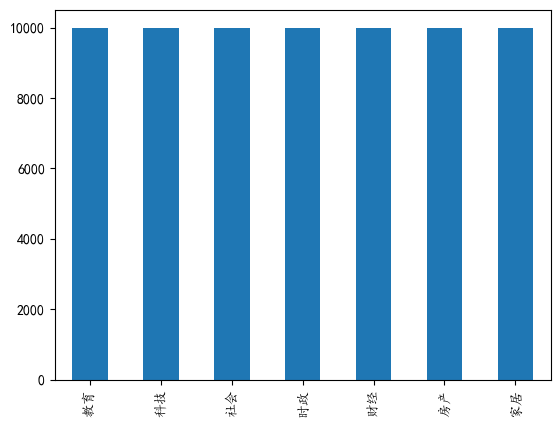

In [5]:
data['label'].value_counts().plot(kind='bar')

In [6]:
from os import listdir
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# 将文件分割成单字, 建立词索引字典     
tok = Tokenizer(num_words=10000)
tok.fit_on_texts(data['cutword'].values)
print("样本数 : ", tok.document_count)

样本数 :  70000


In [7]:
print({k: tok.word_index[k] for k in list(tok.word_index)[:10]})

{'\u3000': 1, '\xa0': 2, '基金': 3, '月': 4, '年': 5, '中国': 6, '日': 7, '市场': 8, '说': 9, '后': 10}


142    237
136    237
137    235
129    234
121    233
      ... 
66     153
40     152
227    151
62     151
49     151
Length: 175, dtype: int64


<AxesSubplot:>

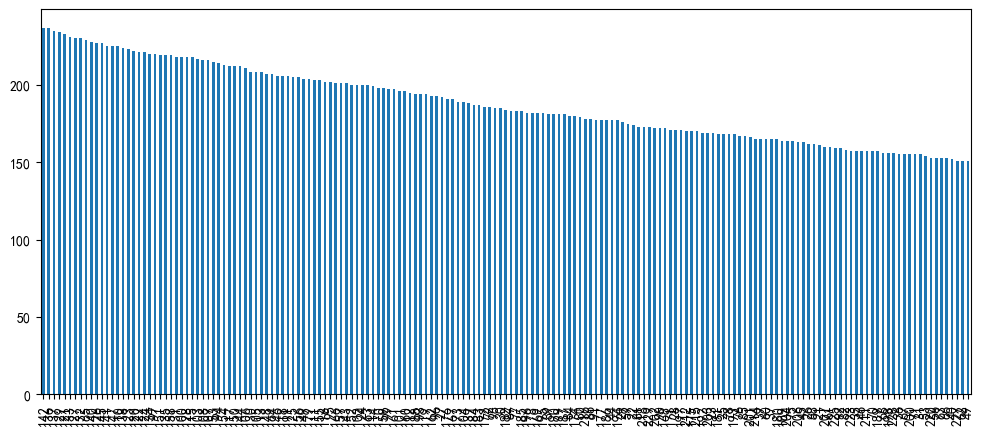

In [8]:
X= tok.texts_to_sequences(data['cutword'].values)
#查看x的长度的分布
length=[]
for i in X:
    length.append(len(i))
v_c=pd.Series(length).value_counts()
print(v_c[v_c>150])
v_c[v_c>150].plot(kind='bar',figsize=(12,5))

In [10]:
lis=list(data['label'].unique())
dic1=dict([(key,value)for (value,key) in enumerate(lis)])
dic2=dict([(value,key) for (key,value) in dic1.items()])
dic1,dic2

({'教育': 0, '科技': 1, '社会': 2, '时政': 3, '财经': 4, '房产': 5, '家居': 6},
 {0: '教育', 1: '科技', 2: '社会', 3: '时政', 4: '财经', 5: '房产', 6: '家居'})

In [13]:
# 将序列数据填充成相同长度 
X= sequence.pad_sequences(X, maxlen=200)
Y=data['label'].map(dic1).values
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)
#X=np.array(X)
#Y=np.array(Y)

X.shape:  (70000, 200)
Y.shape:  (70000,)


In [136]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
X_train.shape,X_test.shape,Y_train.shape, Y_test.shape

((56000, 200), (14000, 200), (56000,), (14000,))

In [137]:
Y_test_original=Y_test.copy()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y= to_categorical(Y)

In [138]:
print(X_train[100:103])
print(Y_test[:3])
Y_test_original[:3]

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  245 4205  746 8193  753    1    1  952    1    1 4205  521
  5373  753    1    1  753 5373  521 6604    1    1 1376  480    4   22
     7   12  282 1132 1409 1007 6468 2807  372  746   10 6468 2807  521
  7920 6468 5373 1125  189 1214  521 5980  282    1    1  119    4 6468
  2807  746 3693 4889  415  952  399 6468 2807  521 7396  801    4   72
     7 6468 2807  521 7396 1367 1795  521 7396   37  753 6468 2807 1795
   688 5881  156  257 7396 4002  753   75 2755   11 6052 2343  144 1807
  5178  297 2434  199 6468 2807 7396 8193 2679 6468 2807 1952 2864    1
     1 6468 2807 8859   10 3356  189  171 1214   81    5   66    4 1668
  2239   19 1944 3467 5373  282   37 7396  379 1590  850  354 14

array([4, 5, 3], dtype=int64)

### 开始构建神经网络！

In [17]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),layers.Dense(embed_dim),] )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim, })
        return config

In [18]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,})
        return config

In [93]:
from keras.preprocessing import sequence
from keras.models import Sequential,Model
from keras.layers import Dense,Input, Dropout, Embedding, Flatten,MaxPooling1D,Conv1D,SimpleRNN,LSTM,GRU,Multiply,GlobalMaxPooling1D
from keras.layers import Bidirectional,Activation,BatchNormalization,GlobalAveragePooling1D,MultiHeadAttention
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate
np.random.seed(0)  # 指定随机数种子  
#单词索引的最大个数10000，单句话最大长度200
top_words=10000  
max_words=200    #序列长度
embed_dim=128    #嵌入维度
num_labels=7   #7分类

In [115]:
def build_model(top_words=top_words,max_words=max_words,num_labels=num_labels,mode='LSTM',hidden_dim=[64]):
    if mode=='RNN':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim, mask_zero=True))
        model.add(Dropout(0.25))
        model.add(SimpleRNN(hidden_dim[0]))  
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='MLP':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim))#, mask_zero=True
        model.add(Flatten())
        model.add(Dropout(0.25))
        model.add(Dense(hidden_dim[0]))  
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='LSTM':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim))
        model.add(Dropout(0.25))
        model.add(LSTM(hidden_dim[0]))
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='GRU':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim))
        model.add(Dropout(0.25))
        model.add(GRU(hidden_dim[0]))
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='CNN':        #一维卷积
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim, mask_zero=True))
        model.add(Dropout(0.25))
        model.add(Conv1D(filters=32, kernel_size=3, padding="same",activation="relu"))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(hidden_dim[0], activation="relu"))
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='CNN+LSTM':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim))
        model.add(Dropout(0.25))    
        model.add(Conv1D(filters=32, kernel_size=3, padding="same",activation="relu"))
        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(hidden_dim[0]))
        model.add(Dropout(0.25))   
        model.add(Dense(num_labels, activation="softmax"))
    elif mode=='BiLSTM':
        model = Sequential()
        model.add(Embedding(top_words, input_length=max_words, output_dim=embed_dim))
        model.add(Bidirectional(LSTM(64)))
        model.add(Dense(hidden_dim[0], activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(num_labels, activation='softmax'))
    #下面的网络采用Funcional API实现
    elif mode=='TextCNN':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        ## 词嵌入使用预训练的词向量
        layer = Embedding(top_words, input_length=max_words, output_dim=embed_dim)(inputs)
        ## 词窗大小分别为3,4,5
        cnn1 = Conv1D(32, 3, padding='same', strides = 1, activation='relu')(layer)
        cnn1 = MaxPooling1D(pool_size=2)(cnn1)
        cnn2 = Conv1D(32, 4, padding='same', strides = 1, activation='relu')(layer)
        cnn2 = MaxPooling1D(pool_size=2)(cnn2)
        cnn3 = Conv1D(32, 5, padding='same', strides = 1, activation='relu')(layer)
        cnn3 = MaxPooling1D(pool_size=2)(cnn3)
        # 合并三个模型的输出向量
        cnn = concatenate([cnn1,cnn2,cnn3], axis=-1)
        x = Flatten()(cnn) 
        x = Dense(hidden_dim[0], activation='relu')(x)
        output = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=output)
        
    elif mode=='Attention':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x = Embedding(top_words, input_length=max_words, output_dim=embed_dim, mask_zero=True)(inputs)
        x = MultiHeadAttention(1, key_dim=embed_dim)(x, x,x)
        x = GlobalAveragePooling1D()(x)
        x = Dropout(0.2)(x)   
        x = Dense(32, activation='relu')(x)
        output = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs=[inputs], outputs=output) 

    elif mode=='MultiHeadAttention':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x = Embedding(top_words, input_length=max_words, output_dim=embed_dim, mask_zero=True)(inputs)
        x = MultiHeadAttention(8, key_dim=embed_dim)(x, x,x)
        x = GlobalAveragePooling1D()(x)
        x = Dropout(0.2)(x)   
        x = Dense(32, activation='relu')(x)
        output = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs=[inputs], outputs=output)      
        
    elif mode=='Attention+BiLSTM':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x = Embedding(top_words, input_length=max_words, output_dim=embed_dim)(inputs)
        x = MultiHeadAttention(2, key_dim=embed_dim)(x, x,x)
        x = Bidirectional(LSTM(hidden_dim[0]))(x) 
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        output = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=output)  
        
    elif mode=='BiGRU+Attention':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x = Embedding(top_words, input_length=max_words, output_dim=embed_dim)(inputs)
        x = Bidirectional(GRU(32,return_sequences=True))(x)
        x = MultiHeadAttention(2, key_dim=embed_dim)(x,x,x)
        x = Bidirectional(GRU(32))(x)
        x = Dropout(0.2)(x)
        output = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs=[inputs], outputs=output) 
                  
    elif mode=='Transformer':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x = Embedding(top_words, input_length=max_words, output_dim=embed_dim, mask_zero=True)(inputs)
        x = TransformerEncoder(embed_dim, 32, 4)(x)
        x = GlobalMaxPooling1D()(x)
        x = Dropout(0.25)(x)
        outputs = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs, outputs)
                  
    elif mode=='PositionalEmbedding+Transformer':
        inputs = Input(name='inputs',shape=[max_words,], dtype='float64')
        x= PositionalEmbedding(sequence_length=max_words, input_dim=top_words, output_dim=embed_dim)(inputs)
        x = TransformerEncoder(embed_dim, 32, 4)(x)
        x = GlobalMaxPooling1D()(x)
        x = Dropout(0.5)(x)
        outputs = Dense(num_labels, activation='softmax')(x)
        model = Model(inputs, outputs)
        
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [71]:
#定义损失和精度的图,和混淆矩阵指标等等
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
def plot_loss(history):
    # 显示训练和验证损失图表
    plt.subplots(1,2,figsize=(10,3))
    plt.subplot(121)
    loss = history.history["loss"]
    epochs = range(1, len(loss)+1)
    val_loss = history.history["val_loss"]
    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "r", label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()  
    plt.subplot(122)
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    plt.plot(epochs, acc, "b-", label="Training Acc")
    plt.plot(epochs, val_acc, "r--", label="Validation Acc")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
def plot_confusion_matrix(model,X_test,Y_test_original):
    #预测概率
    prob=model.predict(X_test) 
    #预测类别
    pred=np.argmax(prob,axis=1)
    #数据透视表，混淆矩阵
    pred=pd.Series(pred).map(dic2)
    Y_test_original=pd.Series(Y_test_original).map(dic2)
    table = pd.crosstab(Y_test_original, pred, rownames=['Actual'], colnames=['Predicted'])
    #print(table)
    sns.heatmap(table,cmap='Blues',fmt='.20g', annot=True)
    plt.tight_layout()
    plt.show()
    #计算混淆矩阵的各项指标
    print(classification_report(Y_test_original, pred))
    #科恩Kappa指标
    print('科恩Kappa'+str(cohen_kappa_score(Y_test_original, pred)))

def evaluation(y_test, y_predict):
    accuracy=classification_report(y_test, y_predict,output_dict=True)['accuracy']
    s=classification_report(y_test, y_predict,output_dict=True)['weighted avg']
    precision=s['precision']
    recall=s['recall']
    f1_score=s['f1-score']
    #kappa=cohen_kappa_score(y_test, y_predict)
    return accuracy,precision,recall,f1_score #, kappa

In [110]:
#定义训练函数
df_eval=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1_score'])
def train_fuc(max_words=max_words,mode='BiLSTM+Attention',batch_size=64,epochs=10,hidden_dim=[64],show_loss=True,show_confusion_matrix=True):
    #构建模型
    model=build_model(max_words=max_words,mode=mode,hidden_dim=hidden_dim)
    print(model.summary())
    es = EarlyStopping(patience=5)
    history=model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2, verbose=1,callbacks=[es])
    print('——————————-----------------——训练完毕—————-----------------------------———————')
    
    # 评估模型
    #loss, accuracy = model.evaluate(X_test, Y_test)  ;  print("测试数据集的准确度 = {:.4f}".format(accuracy))
    prob=model.predict(X_test) ;  pred=np.argmax(prob,axis=1)
    score=list(evaluation(Y_test_original, pred))
    df_eval.loc[mode,:]=score
    
    if show_loss:
        plot_loss(history)
    if show_confusion_matrix:
        plot_confusion_matrix(model=model,X_test=X_test,Y_test_original=Y_test_original)

In [133]:
top_words=10000
max_words=200
batch_size=128
epochs=5
hidden_dim=[64]
show_confusion_matrix=True
show_loss=True

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 flatten_13 (Flatten)        (None, 25600)             0         
                                                                 
 dropout_59 (Dropout)        (None, 25600)             0         
                                                                 
 dense_75 (Dense)            (None, 64)                1638464   
                                                                 
 dropout_60 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 7)                 455       
                                                                 
Total params: 2,918,919
Trainable params: 2,918,919
N

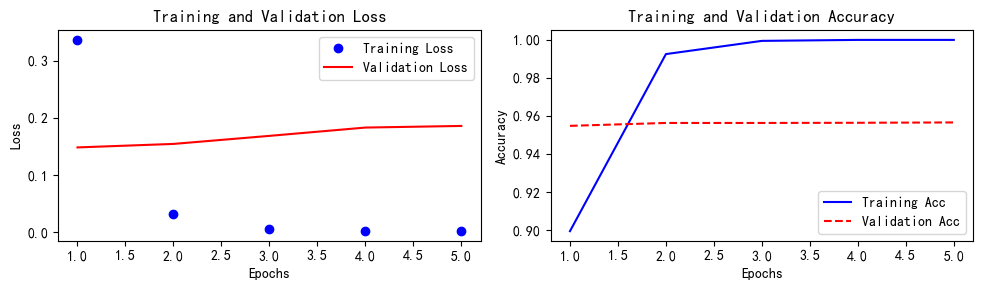

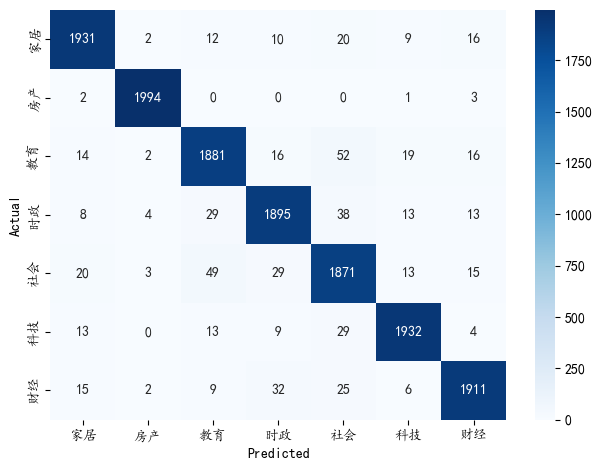

              precision    recall  f1-score   support

          家居       0.96      0.97      0.96      2000
          房产       0.99      1.00      1.00      2000
          教育       0.94      0.94      0.94      2000
          时政       0.95      0.95      0.95      2000
          社会       0.92      0.94      0.93      2000
          科技       0.97      0.97      0.97      2000
          财经       0.97      0.96      0.96      2000

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

科恩Kappa0.95125


In [118]:
train_fuc(mode='MLP',batch_size=batch_size,epochs=epochs)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 dropout_27 (Dropout)        (None, 200, 128)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 200, 32)           12320     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 100, 32)          0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_33 (Dense)            (None, 64)                204864    
                                                     

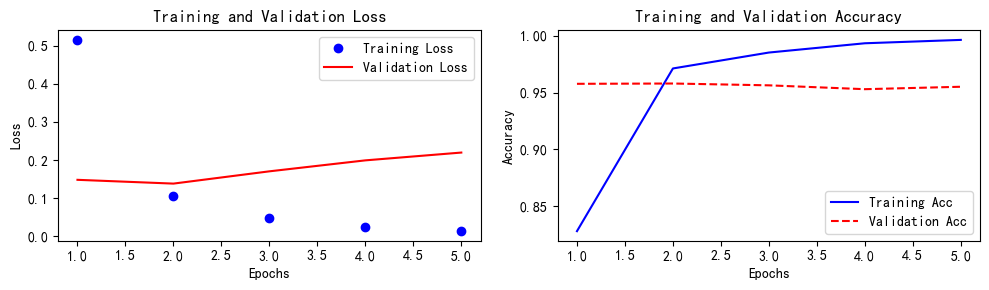

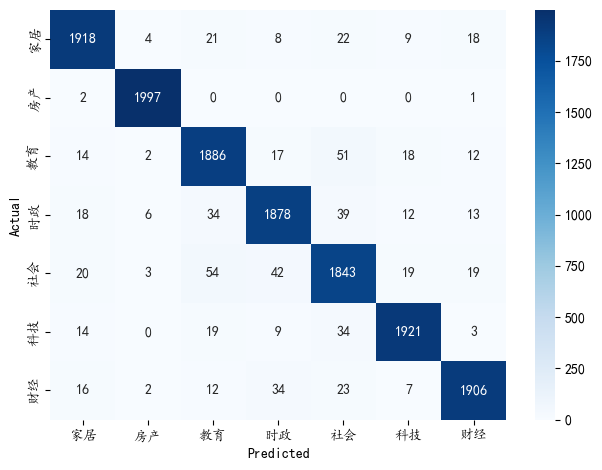

              precision    recall  f1-score   support

          家居       0.96      0.96      0.96      2000
          房产       0.99      1.00      1.00      2000
          教育       0.93      0.94      0.94      2000
          时政       0.94      0.94      0.94      2000
          社会       0.92      0.92      0.92      2000
          科技       0.97      0.96      0.96      2000
          财经       0.97      0.95      0.96      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.94575


In [75]:
#X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test= X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
train_fuc(mode='CNN',batch_size=batch_size,epochs=epochs)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 dropout_33 (Dropout)        (None, 200, 128)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,292,807
Trainable params: 1,292,807
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
350/350 [===================

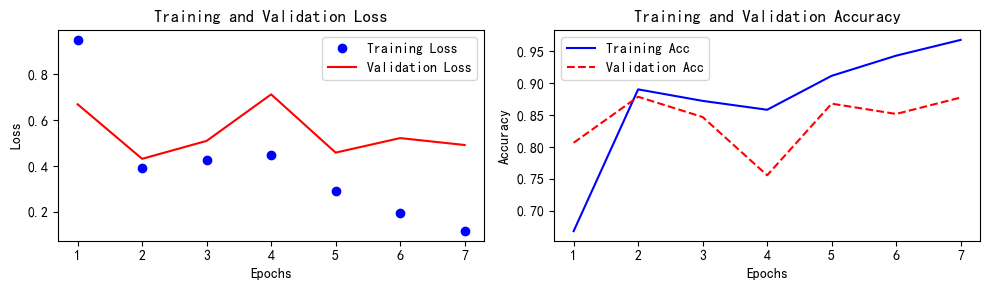

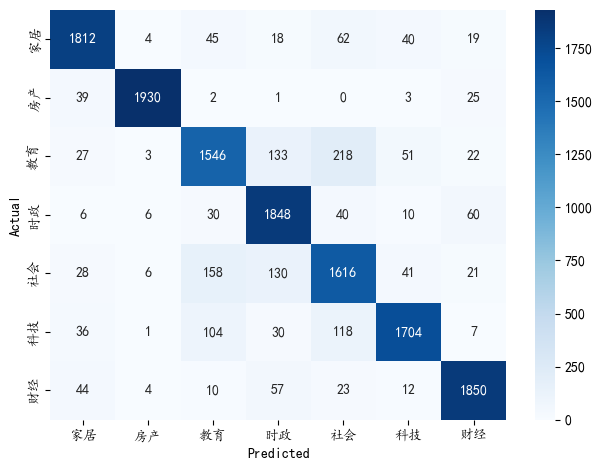

              precision    recall  f1-score   support

          家居       0.91      0.91      0.91      2000
          房产       0.99      0.96      0.98      2000
          教育       0.82      0.77      0.79      2000
          时政       0.83      0.92      0.88      2000
          社会       0.78      0.81      0.79      2000
          科技       0.92      0.85      0.88      2000
          财经       0.92      0.93      0.92      2000

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

科恩Kappa0.8588333333333333


In [79]:
model='RNN' 
train_fuc(mode=model,batch_size=batch_size,epochs=8)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 dropout_35 (Dropout)        (None, 200, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,329,863
Trainable params: 1,329,863
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
700/700 [===================

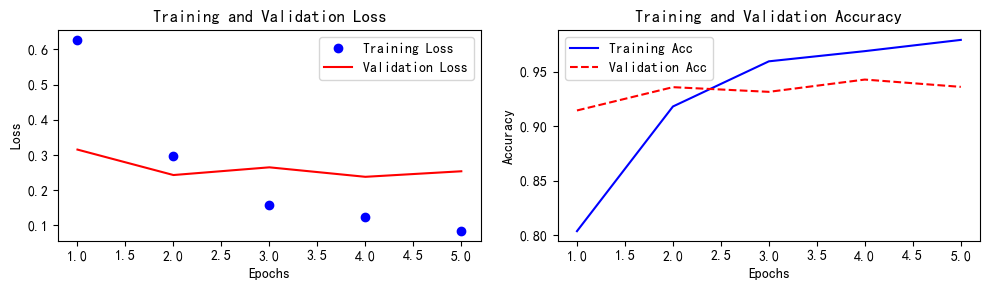

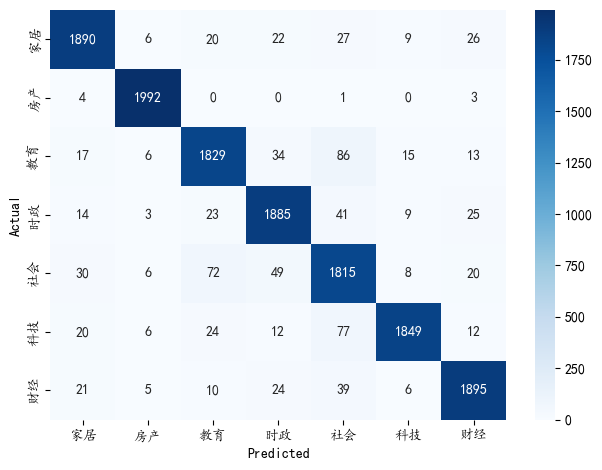

              precision    recall  f1-score   support

          家居       0.95      0.94      0.95      2000
          房产       0.98      1.00      0.99      2000
          教育       0.92      0.91      0.92      2000
          时政       0.93      0.94      0.94      2000
          社会       0.87      0.91      0.89      2000
          科技       0.98      0.92      0.95      2000
          财经       0.95      0.95      0.95      2000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

科恩Kappa0.9295833333333333


In [80]:
train_fuc(mode='LSTM',epochs=epochs)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 dropout_37 (Dropout)        (None, 200, 128)          0         
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,317,703
Trainable params: 1,317,703
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
700/700 [===================

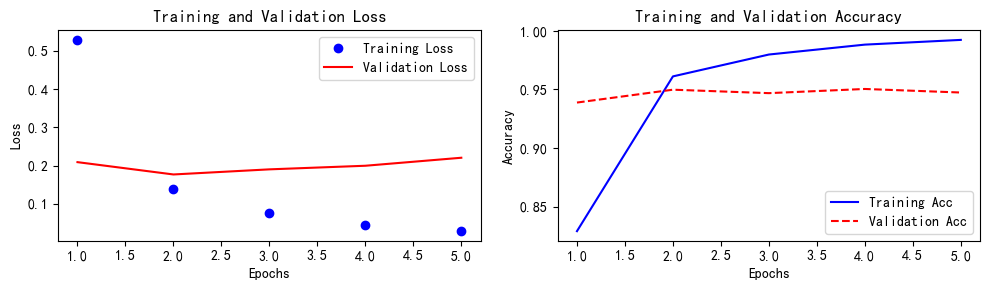

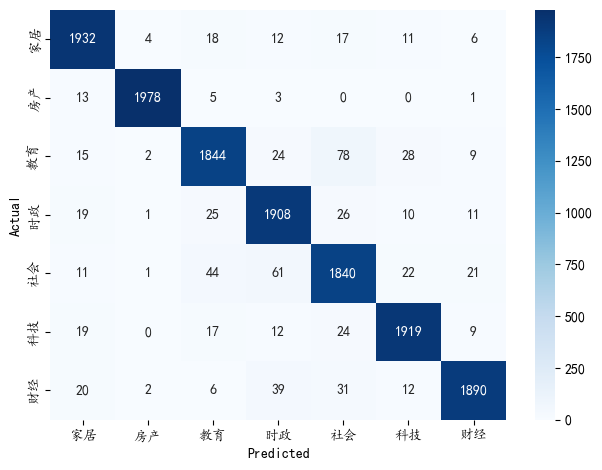

              precision    recall  f1-score   support

          家居       0.95      0.97      0.96      2000
          房产       0.99      0.99      0.99      2000
          教育       0.94      0.92      0.93      2000
          时政       0.93      0.95      0.94      2000
          社会       0.91      0.92      0.92      2000
          科技       0.96      0.96      0.96      2000
          财经       0.97      0.94      0.96      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.9425833333333333


In [81]:
train_fuc(mode='GRU',epochs=epochs)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 dropout_39 (Dropout)        (None, 200, 128)          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 200, 32)           12320     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 100, 32)          0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                     

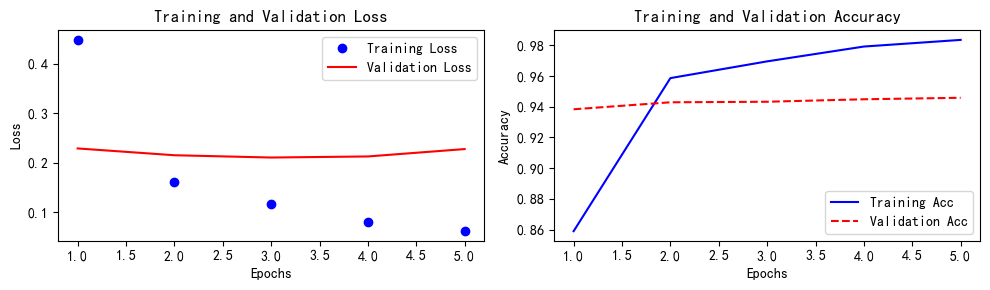

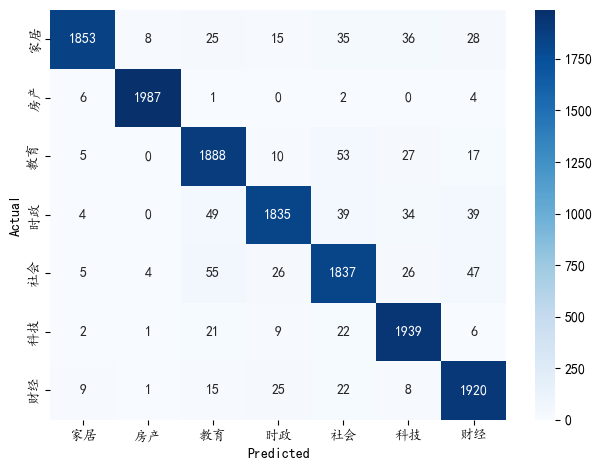

              precision    recall  f1-score   support

          家居       0.98      0.93      0.95      2000
          房产       0.99      0.99      0.99      2000
          教育       0.92      0.94      0.93      2000
          时政       0.96      0.92      0.94      2000
          社会       0.91      0.92      0.92      2000
          科技       0.94      0.97      0.95      2000
          财经       0.93      0.96      0.95      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.93825


In [82]:
train_fuc(mode='CNN+LSTM',epochs=epochs)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,387,527
Trainable params: 1,387,527
Non-trainable params: 0
___________________________________________

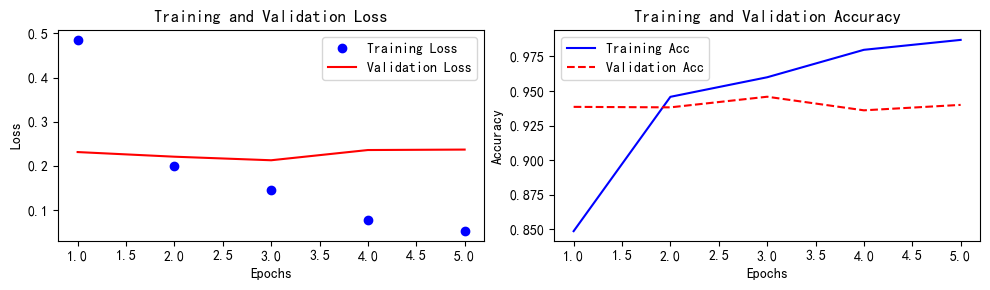

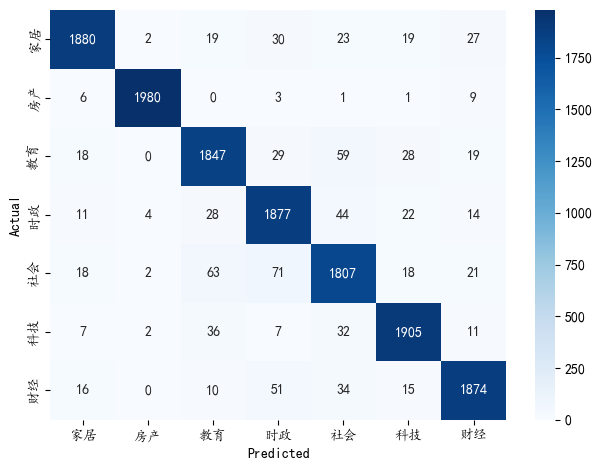

              precision    recall  f1-score   support

          家居       0.96      0.94      0.95      2000
          房产       0.99      0.99      0.99      2000
          教育       0.92      0.92      0.92      2000
          时政       0.91      0.94      0.92      2000
          社会       0.90      0.90      0.90      2000
          科技       0.95      0.95      0.95      2000
          财经       0.95      0.94      0.94      2000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

科恩Kappa0.9308333333333333


In [83]:
train_fuc(mode='BiLSTM',epochs=epochs)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200)]        0           []                               
                                                                                                  
 embedding_27 (Embedding)       (None, 200, 128)     1280000     ['inputs[0][0]']                 
                                                                                                  
 conv1d_7 (Conv1D)              (None, 200, 32)      12320       ['embedding_27[0][0]']           
                                                                                                  
 conv1d_8 (Conv1D)              (None, 200, 32)      16416       ['embedding_27[0][0]']           
                                                                                            

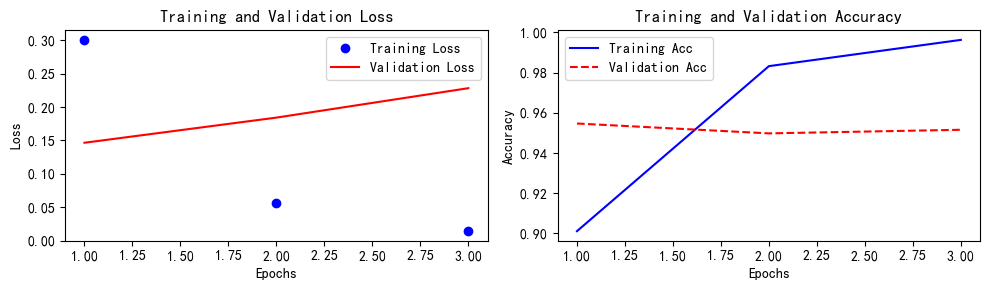

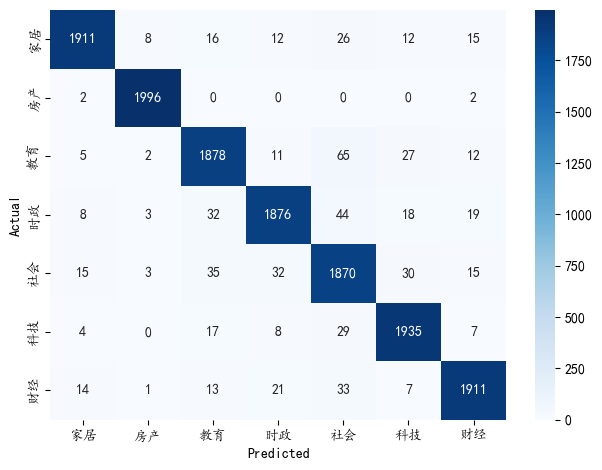

              precision    recall  f1-score   support

          家居       0.98      0.96      0.97      2000
          房产       0.99      1.00      0.99      2000
          教育       0.94      0.94      0.94      2000
          时政       0.96      0.94      0.95      2000
          社会       0.90      0.94      0.92      2000
          科技       0.95      0.97      0.96      2000
          财经       0.96      0.96      0.96      2000

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

科恩Kappa0.9480833333333334


In [84]:
train_fuc(mode='TextCNN',epochs=3)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200)]        0           []                               
                                                                                                  
 embedding_28 (Embedding)       (None, 200, 128)     1280000     ['inputs[0][0]']                 
                                                                                                  
 multi_head_attention_6 (MultiH  (None, 200, 128)    66048       ['embedding_28[0][0]',           
 eadAttention)                                                    'embedding_28[0][0]',           
                                                                  'embedding_28[0][0]']           
                                                                                            

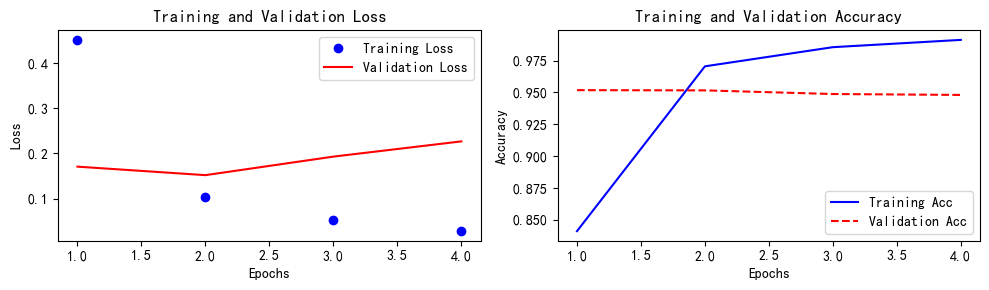

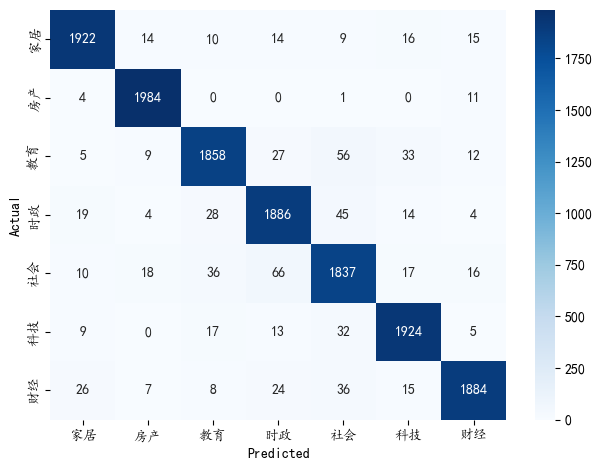

              precision    recall  f1-score   support

          家居       0.96      0.96      0.96      2000
          房产       0.97      0.99      0.98      2000
          教育       0.95      0.93      0.94      2000
          时政       0.93      0.94      0.94      2000
          社会       0.91      0.92      0.91      2000
          科技       0.95      0.96      0.96      2000
          财经       0.97      0.94      0.95      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.94125


In [85]:
train_fuc(mode='Attention',epochs=4)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200)]        0           []                               
                                                                                                  
 embedding_29 (Embedding)       (None, 200, 128)     1280000     ['inputs[0][0]']                 
                                                                                                  
 multi_head_attention_7 (MultiH  (None, 200, 128)    527488      ['embedding_29[0][0]',           
 eadAttention)                                                    'embedding_29[0][0]',           
                                                                  'embedding_29[0][0]']           
                                                                                            

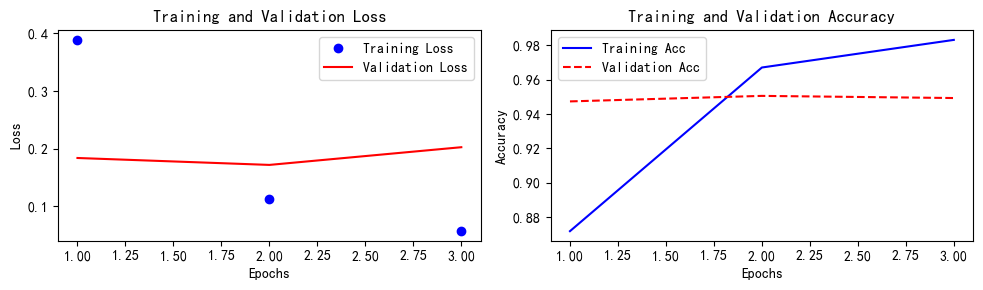

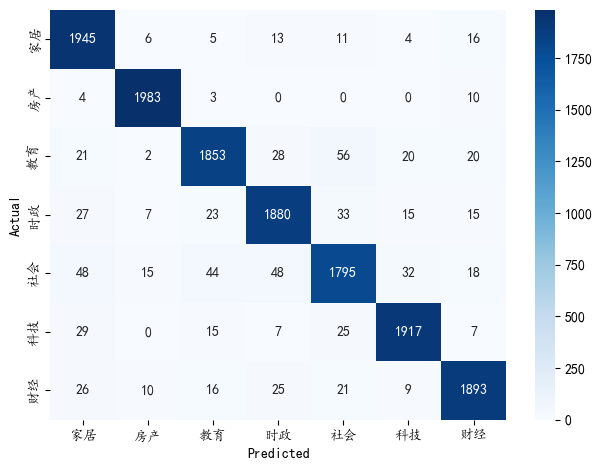

              precision    recall  f1-score   support

          家居       0.93      0.97      0.95      2000
          房产       0.98      0.99      0.99      2000
          教育       0.95      0.93      0.94      2000
          时政       0.94      0.94      0.94      2000
          社会       0.92      0.90      0.91      2000
          科技       0.96      0.96      0.96      2000
          财经       0.96      0.95      0.95      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.9388333333333333


In [86]:
train_fuc(mode='MultiHeadAttention',epochs=3)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200)]        0           []                               
                                                                                                  
 embedding_30 (Embedding)       (None, 200, 128)     1280000     ['inputs[0][0]']                 
                                                                                                  
 multi_head_attention_8 (MultiH  (None, 200, 128)    131968      ['embedding_30[0][0]',           
 eadAttention)                                                    'embedding_30[0][0]',           
                                                                  'embedding_30[0][0]']           
                                                                                           

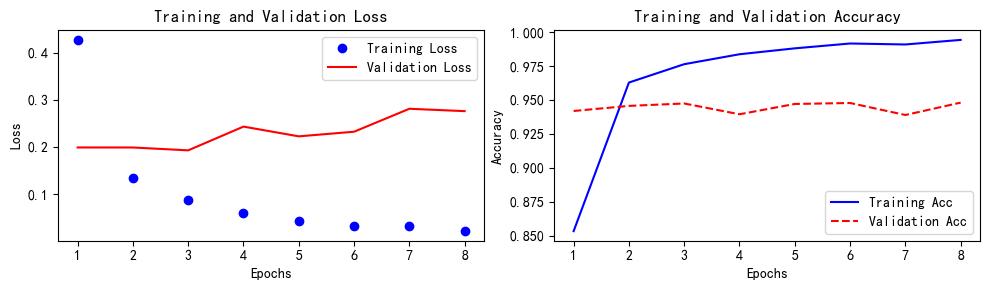

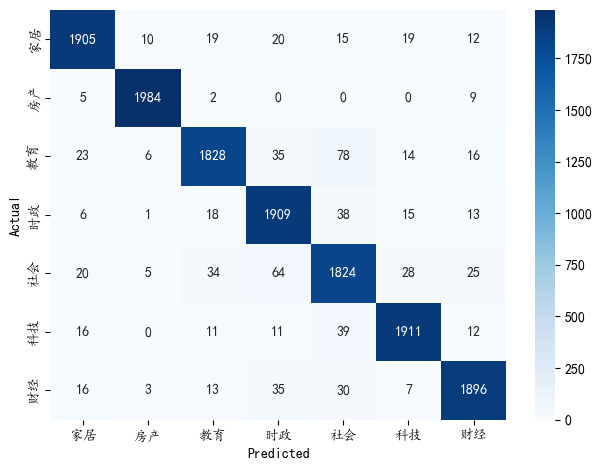

              precision    recall  f1-score   support

          家居       0.96      0.95      0.95      2000
          房产       0.99      0.99      0.99      2000
          教育       0.95      0.91      0.93      2000
          时政       0.92      0.95      0.94      2000
          社会       0.90      0.91      0.91      2000
          科技       0.96      0.96      0.96      2000
          财经       0.96      0.95      0.95      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.9380833333333334


In [87]:
train_fuc(mode='Attention+BiLSTM',epochs=8)

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200)]        0           []                               
                                                                                                  
 embedding_31 (Embedding)       (None, 200, 128)     1280000     ['inputs[0][0]']                 
                                                                                                  
 bidirectional_6 (Bidirectional  (None, 200, 64)     31104       ['embedding_31[0][0]']           
 )                                                                                                
                                                                                                  
 multi_head_attention_9 (MultiH  (None, 200, 64)     66368       ['bidirectional_6[0][0]', 

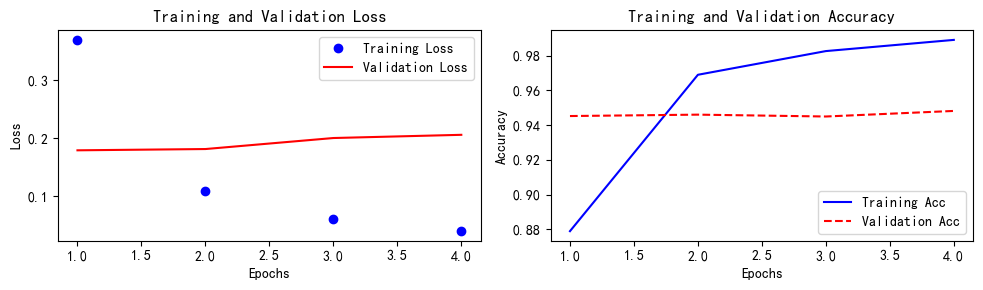

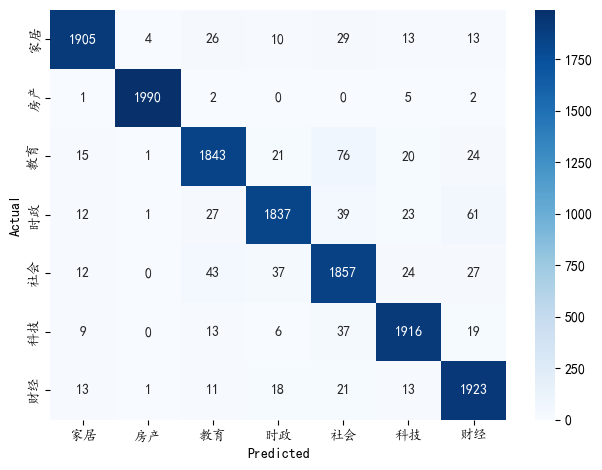

              precision    recall  f1-score   support

          家居       0.97      0.95      0.96      2000
          房产       1.00      0.99      1.00      2000
          教育       0.94      0.92      0.93      2000
          时政       0.95      0.92      0.94      2000
          社会       0.90      0.93      0.92      2000
          科技       0.95      0.96      0.95      2000
          财经       0.93      0.96      0.95      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.93925


In [88]:
train_fuc(mode='BiGRU+Attention',epochs=4)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding_32 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 transformer_encoder_2 (Tran  (None, 200, 128)         272672    
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_46 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 7)                 903

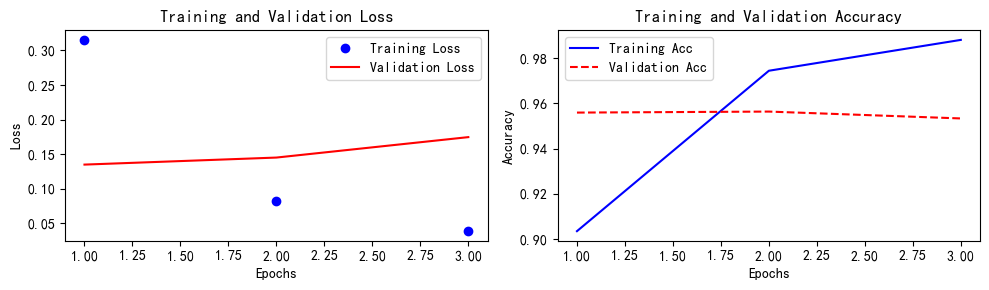

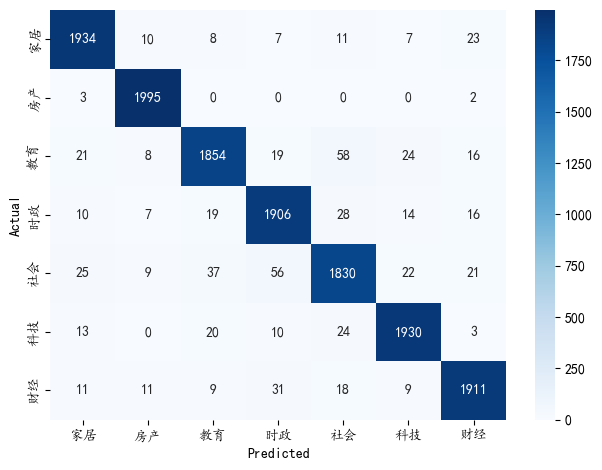

              precision    recall  f1-score   support

          家居       0.96      0.97      0.96      2000
          房产       0.98      1.00      0.99      2000
          教育       0.95      0.93      0.94      2000
          时政       0.94      0.95      0.95      2000
          社会       0.93      0.92      0.92      2000
          科技       0.96      0.96      0.96      2000
          财经       0.96      0.96      0.96      2000

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

科恩Kappa0.9466666666666667


In [89]:
train_fuc(mode='Transformer',epochs=3)

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 positional_embedding_4 (Pos  (None, 200, 128)         1305600   
 itionalEmbedding)                                               
                                                                 
 transformer_encoder_6 (Tran  (None, 200, 128)         272672    
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_52 (Dropout)        (None, 128)               0         
                                                          

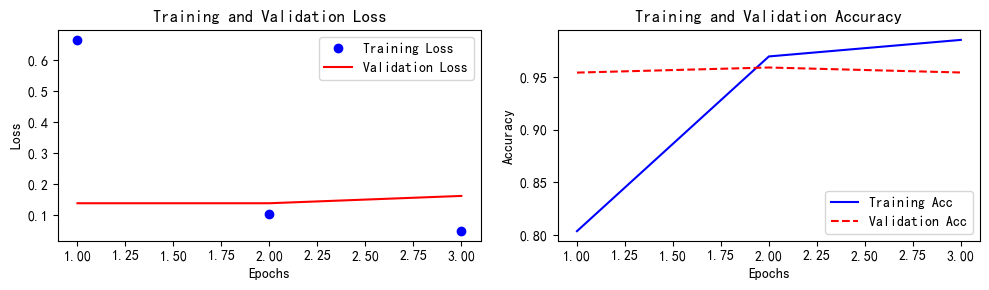

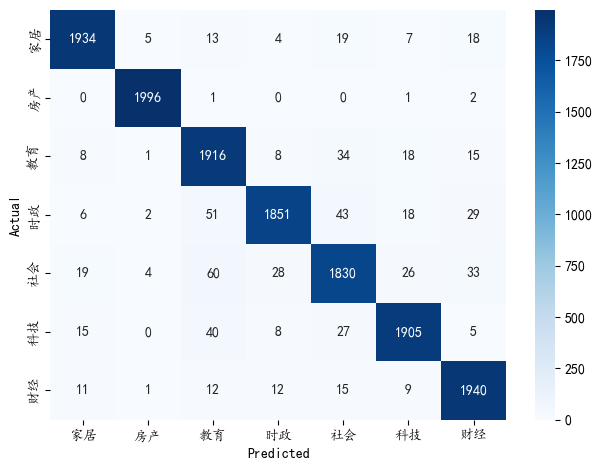

              precision    recall  f1-score   support

          家居       0.97      0.97      0.97      2000
          房产       0.99      1.00      1.00      2000
          教育       0.92      0.96      0.94      2000
          时政       0.97      0.93      0.95      2000
          社会       0.93      0.92      0.92      2000
          科技       0.96      0.95      0.96      2000
          财经       0.95      0.97      0.96      2000

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

科恩Kappa0.9476666666666667


In [105]:
train_fuc(mode='PositionalEmbedding+Transformer',batch_size=batch_size,epochs=3)

In [119]:
df_eval.assign(s=df_eval.sum(axis=1))#['s'].idxmax()

,Accuracy,Precision,Recall,F1_score,s
MLP,0.958214,0.958299,0.958214,0.95824,3.832968
CNN,0.9535,0.953568,0.9535,0.953516,3.814083
RNN,0.879,0.880512,0.879,0.879117,3.517629
LSTM,0.939643,0.940258,0.939643,0.939783,3.759327
GRU,0.950786,0.951012,0.950786,0.950821,3.803405
CNN+LSTM,0.947071,0.94767,0.947071,0.947098,3.788911
BiLSTM,0.940714,0.940992,0.940714,0.940793,3.763213
TextCNN,0.9555,0.955781,0.9555,0.955564,3.822345
Attention,0.949643,0.949735,0.949643,0.949625,3.798645
MultiHeadAttention,0.947571,0.947586,0.947571,0.947446,3.790175


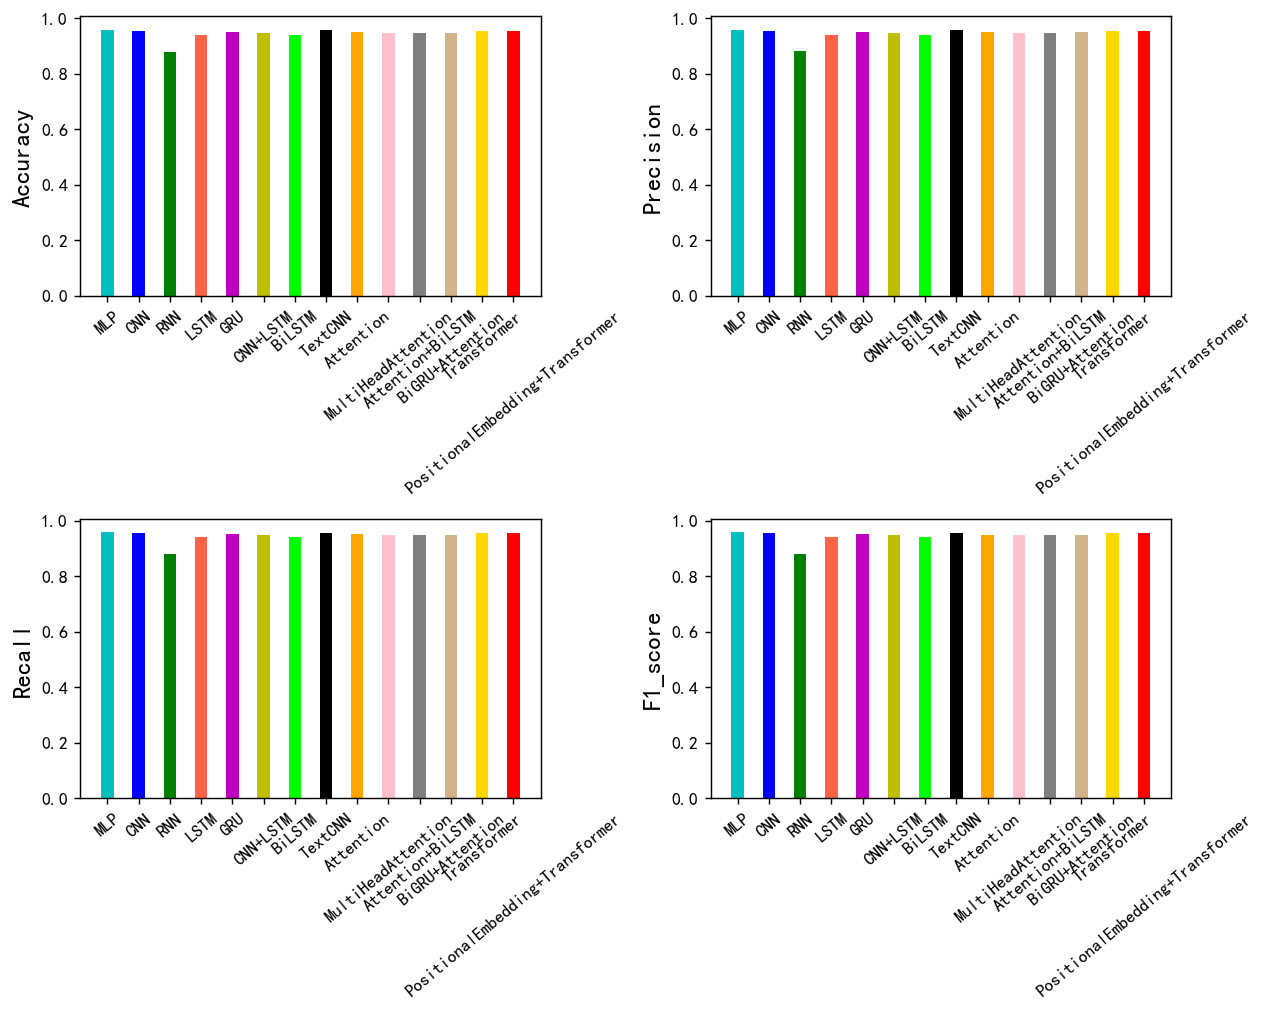

In [120]:
bar_width = 0.4
colors=['c', 'b', 'g', 'tomato', 'm', 'y', 'lime', 'k','orange','pink','grey','tan','gold','r']
fig, ax = plt.subplots(2,2,figsize=(10,8),dpi=128)
for i,col in enumerate(df_eval.columns):
    n=int(str('22')+str(i+1))
    plt.subplot(n)
    df_col=df_eval[col]
    m =np.arange(len(df_col))
    plt.bar(x=m,height=df_col.to_numpy(),width=bar_width,color=colors)
    
    #plt.xlabel('Methods',fontsize=12)
    names=df_col.index
    plt.xticks(range(len(df_col)),names,fontsize=10)
    plt.xticks(rotation=40)
    plt.ylabel(col,fontsize=14)
    
plt.tight_layout()
#plt.savefig('柱状图.jpg',dpi=512)
plt.show()

### 拿出来预测

In [139]:
model=build_model(max_words=max_words,mode='PositionalEmbedding+Transformer',hidden_dim=hidden_dim)
history=model.fit(X,Y,batch_size=batch_size,epochs=3,verbose=0)

In [154]:
new_txt='''近日，上海一骑手在短视频平台发布自己“送外卖三年赚了102万”，引发诸多关注，相关话题冲上微博高位热搜。据澎湃新闻报道，26岁的陈思，小学未毕业，二十多岁创业失败，负债来到上海，摸爬滚打3年，逆袭成为上海的“跑单王”之一。
1月15日，有自媒体发布消息称“据说这个外卖小哥被同行打了，帖子配图是陈思鼻子流血的照片，地上还有带血的餐巾纸。陈思表示，这是假消息，他流鼻血是因为之前上火引起，网传图片也不是发生在最近这两天，而是发生在2023年12月。“我没有被同行打，网上图片是因为之前上火了。”陈思说，这段时间自己在正常工作，希望大家不要传谣。
提供外卖小哥3年挣了102万据澎湃新闻报道，陈思是江西抚州人，之前在老家开饭店，为此向银行贷款80万元。据他所说，饭店开了5个月后亏损严重，只得放弃。背负着贷款，陈思决定来上海闯闯看，“当时满脑子就想着挣钱还债，迈出这一步去闯，不会比现在更差，只会更好。”2019年陈思刚来上海时，在饭店当厨师，月薪13000元。厨师干了快一年的时候，他发觉送外卖好像赚得更多，便也想尝试一下。于是，2020年，他加入了众包骑手的队伍，主业做厨师，副业送外卖，“那时比现在还辛苦，一天大概就睡3个小时。”后来，陈思索性辞掉了厨师的工作，专职送外卖。在他自己社交平台的账号视频中，他皮肤粗糙，手上有不少伤痕和冻疮，只看外表很难看出他是个只有二十五六的年轻人。
提供“这三年多，我赚了102万元。”陈思拿出手机展示了自己近期的收入，2023年8月，他在某外卖平台的收入达4万多元，同年9月收入25470元，10月收入19497元，11月收入25786元。澎湃新闻报道称，从相关业内人士和平台方获悉，陈思此前确实多次成为平台众包骑手中的月度“单王”，三年赚了102万元也得到确认。据封面新闻报道，业内人士也表示如果同时在多个平台接单，并且多次成为月度“单王”，三年赚102万元是可以做到的。如今，陈思已还清了开饭店所贷的80万元，因为在老家买房，还背着10万元房贷。陈思坦言，自己把赚钱放在第一位，但也希望大家不要模仿他这样的工作强度，量力而行。
“和努力、能力、运气都有关系”据九派新闻统计，在过往的20篇关于外卖“单王”的新闻报道中，有14篇写出了骑手明确的月薪。在2024年之前，外卖“单王”骑手中，月薪最高的是来自武汉的光谷“单王”陈浩。他在采访中表示，自己2022年年全年收入22万元，单月最高收入可达23567元。“单王”们的收入远超普通骑手。根据饿了么在2018年发布的《2018外卖骑手群体洞察报告》，4成的骑手收入在4000-6000元之间。收入超过1万元的骑手比例不足2%。在美团发布的《2018年外卖骑手群体研究报告》中，同样指出月收入在万元以上的骑手比例基本不足1%。
而在这种超额薪资的背后，所有的外卖“单王”都表现出了惊人的工作时长。在20篇新闻报道中，有10篇报道都明确提及了他们的工作时长。其中有5名单王在采访中都表示自己一天的工作时长超过16个小时。2017年的济南“单王”韩化龙还表示“一年365天，我能跑360天。”在接受潇湘晨报采访时，陈思表示，他没有任何社交和娱乐活动，每天就是上班和睡觉。“我是在两个不同的平台跑，平均每个月可以有3万，最高的一个月有6万，这跟很多因素有关，你的努力、能力、运气都有关系，而且我不挑活，有活就干，平台给我活我就干，平台没活给我干的话我就干别的平台。”陈思透露，他一天多的时候可以跑200多单，有时候180多单，有的距离远的或者点得多的平台会有补贴。
前两年疫情的时候，有的不能送上楼或者送进小区，这种单子用时短，送得就快。在花费方面，“我每个月的花费大概在2000到2500元，800的房租，
其他花销就是吃饭，基本没有多余的花销。”陈思表示。有网友质疑他几分钟就要跑一单，陈思解释称，“我出去跑一圈，最多能带12单，对路线对商家的出餐速度都要熟悉。有时候一个顾客连续下单，连续4单都是我一个人送，这跟运气也有关系，但跟努力更有关系，努力大于一切。我知道很多人不相信我一个月可以赚到这么多钱，但没关系，这无所谓，反正我做到了就可以。'''

### 自定义一个类别处理函数

In [155]:
def predict_newkind(new_txt,token=tok):
    dic2={0: '教育', 1: '科技', 2: '社会', 3: '时政', 4: '财经', 5: '房产', 6: '家居'}
    new_txt=txt_cut(new_txt)
    new_text_seq = tok.texts_to_sequences([new_txt])
    new_text_seq_padded = sequence.pad_sequences(new_text_seq, maxlen=200)
    predictions = model.predict(new_text_seq_padded)
    predicted_class = np.argmax(predictions, axis=1)
    return dic2[predicted_class[0]]

In [156]:
predict_newkind(new_txt)

'社会'

In [157]:
new_txt='''1.科学家使用世界最强大的超级计算机的仅8%算力，成功训练出ChatGPT规模的模型。
2.Oak Ridge National Laboratory的研究团队在Frontier超级计算机上使用创新技术，仅用数千个AMD GPU训练了一个拥有万亿参数的语言模型。
3.通过分布式训练策略和各种并行技术，研究团队实现了在仅占用Frontier计算能力8%的情况下，训练1750亿参数和1万亿参数模型的百分之百弱扩展效率。
站长之家（ChinaZ.com）1月10日 消息:科学家们在世界上最强大的超级计算机上取得了巨大突破，仅使用其8%的计算能力，成功训练了一个与ChatGPT规模相当的模型。这项研究来自著名的Oak Ridge National Laboratory，他们在Frontier超级计算机上采用了创新技术，仅使用数千个AMD GPU就训练出了一个拥有万亿参数的语言模型。
通常，训练像OpenAI的ChatGPT这样规模的语言模型需要一个庞大的超级计算机。然而，Frontier团队采用了分布式训练策略，通过优化并行架构，仅使用Frontier计算能力的8%就成功完成了这一任务。具体而言，他们采用了随机数据并行和张量并行等技术，以降低节点之间的通信，同时处理内存限制。
这项研究的结果显示，在1750亿参数和1万亿参数模型的情况下，弱扩展效率达到了100%。此外，这个项目还取得了这两个模型的强扩展效率分别为89%和87%。
然而，训练拥有万亿参数的大型语言模型始终是一个具有挑战性的任务。研究人员指出，这个模型的体积至少为14TB，而Frontier中的一块MI250X GPU只有64GB。他们强调，需要进一步研究和开发方法来克服内存问题。
在面临大批次大小导致的损失发散问题时，研究人员提出，未来关于大规模系统训练时间的研究必须改善大批次训练，并采用更小的每副本批次大小。此外，研究人员呼吁在AMD GPU上进行更多工作，指出目前大多数大规模模型训练都是在支持Nvidia解决方案的平台上进行的。尽管研究人员为在非Nvidia平台上高效训练大型语言模型提供了“蓝图”，但他们认为有必要更深入地研究在AMD GPU上的高效训练性能。
Frontier在最近的Top500榜单中保持其作为最强大超级计算机的地位，超过了Intel推出的Aurora超级计算机。这项研究为未来训练巨大语言模型提供了宝贵的经验和方法，同时也突显了分布式训练和并行计算在实现这一目标上的关键作用。'''

In [158]:
predict_newkind(new_txt)

'科技'

In [153]:
import pickle
from tensorflow.keras.models import save_model
# 保存Tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
model.save('my_model.h5')  # 保存模型到HDF5文件